In [535]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [536]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [537]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [538]:
df.shape

(2240, 29)

In [539]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [540]:
income_mean = df.groupby('Education')['Income'].mean()

df['Income'] = df['Income'].fillna(df['Education'].map(income_mean))

In [541]:
df['Education'].map(income_mean)

0       52720.373656
1       52720.373656
2       52720.373656
3       52720.373656
4       56145.313929
            ...     
2235    52720.373656
2236    56145.313929
2237    52720.373656
2238    52917.534247
2239    56145.313929
Name: Education, Length: 2240, dtype: float64

In [542]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#### We will perform feature engineering : 

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [544]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [545]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [546]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

we can merge both the number of kids and teens in one column. and the number of purchases in another column 

In [547]:
from datetime import datetime

In [548]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [549]:
df.drop(columns=['Recency'], inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
max_date = df['Dt_Customer'].max()
df['Days_since_enrolment'] = df['Dt_Customer'].apply(lambda x: (max_date - x).days)
df['Age'] = datetime.now().year - df['Year_Birth']


df['Total Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Prob_wines'] = df['MntWines'] / df['Total Spending']
df['Prob_fruits'] = df['MntFruits'] / df['Total Spending']
df['Prob_meatproducts'] = df['MntMeatProducts'] / df['Total Spending']
df['Prob_fishproducts'] = df['MntFishProducts'] / df['Total Spending']
df['Prob_sweetproducts'] = df['MntSweetProducts'] / df['Total Spending']
df['Prop_goldprods']=df['MntGoldProds'] / df['Total Spending']


df['Offers_Responded_To'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

df['Total Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Year_Birth','Response', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases','Year_Birth','Dt_Customer','ID'], inplace=True)


In [550]:
df.describe()

,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52253.592375,0.444196,0.506250,5.316518,0.009375,353.582143,54.194196,605.798214,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196,0.446875,14.862054
std,25039.085601,0.538398,0.544538,2.426645,0.096391,202.122512,11.984069,602.249288,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988,0.890543,7.677173
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,0.000000,0.000000,3.000000,0.000000,180.750000,46.000000,68.750000,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095,0.000000,8.000000
50%,51609.500000,0.000000,0.000000,6.000000,0.000000,355.500000,53.000000,396.000000,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294,0.000000,15.000000
75%,68289.750000,1.000000,1.000000,7.000000,0.000000,529.000000,64.000000,1045.500000,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768,1.000000,21.000000
max,666666.000000,2.000000,2.000000,20.000000,1.000000,699.000000,130.000000,2525.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,5.000000,44.000000


we will remove outliers such as age that has 130 years as a maximum and we will remove outliers from income.

In [551]:

columns = ['Income', 'Age','Total Purchases']
for column in columns:
  Q1 = df[column].quantile(0.2)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1 
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound) ]


In [552]:
df.shape

(2228, 18)

In [553]:
df.describe()

,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,51657.275548,0.444345,0.507630,5.336176,0.008977,353.694345,54.115799,605.036355,0.459575,0.049446,0.248345,0.071483,0.050863,0.120287,0.448833,14.856373
std,20581.304006,0.538629,0.544751,2.413776,0.094340,202.256006,11.708097,600.694540,0.227800,0.055748,0.123039,0.077829,0.061212,0.108981,0.892308,7.600547
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35434.750000,0.000000,0.000000,3.000000,0.000000,180.750000,46.000000,69.000000,0.290575,0.008976,0.156250,0.012578,0.008644,0.038122,0.000000,8.000000
50%,51523.500000,0.000000,0.000000,6.000000,0.000000,355.500000,53.000000,396.500000,0.458224,0.029851,0.233333,0.048193,0.033475,0.085941,0.000000,15.000000
75%,68118.000000,1.000000,1.000000,7.000000,0.000000,529.000000,64.000000,1043.250000,0.639765,0.070080,0.328149,0.103809,0.070719,0.169912,1.000000,21.000000
max,113734.000000,2.000000,2.000000,20.000000,1.000000,699.000000,83.000000,2525.000000,0.963303,0.445545,0.957117,0.590909,0.945848,0.894150,5.000000,39.000000


In [554]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases
0,Graduation,Single,58138.0,0,0,7,0,663,66,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1,25
1,Graduation,Single,46344.0,1,1,5,0,113,69,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,6
2,Graduation,Together,71613.0,0,0,4,0,312,58,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,21
3,Graduation,Together,26646.0,1,0,6,0,139,39,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,8
4,PhD,Married,58293.0,1,0,5,0,161,42,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,19


In [555]:
df.shape

(2228, 18)

Making age column into categories : 

In [556]:
bins = list(range(0, 100, 10))

labels = ['0-10','11-20','21-30','31-40','41-50', '51-60', '61-70', '71-80', '81-90']

df['Age_group'] = pd.cut(df['Age'], bins, labels=labels)

In [557]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases,Age_group
0,Graduation,Single,58138.0,0,0,7,0,663,66,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1,25,61-70
1,Graduation,Single,46344.0,1,1,5,0,113,69,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,6,61-70
2,Graduation,Together,71613.0,0,0,4,0,312,58,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,21,51-60
3,Graduation,Together,26646.0,1,0,6,0,139,39,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,8,31-40
4,PhD,Married,58293.0,1,0,5,0,161,42,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,19,41-50


In [558]:
df.describe()

,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,51657.275548,0.444345,0.507630,5.336176,0.008977,353.694345,54.115799,605.036355,0.459575,0.049446,0.248345,0.071483,0.050863,0.120287,0.448833,14.856373
std,20581.304006,0.538629,0.544751,2.413776,0.094340,202.256006,11.708097,600.694540,0.227800,0.055748,0.123039,0.077829,0.061212,0.108981,0.892308,7.600547
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35434.750000,0.000000,0.000000,3.000000,0.000000,180.750000,46.000000,69.000000,0.290575,0.008976,0.156250,0.012578,0.008644,0.038122,0.000000,8.000000
50%,51523.500000,0.000000,0.000000,6.000000,0.000000,355.500000,53.000000,396.500000,0.458224,0.029851,0.233333,0.048193,0.033475,0.085941,0.000000,15.000000
75%,68118.000000,1.000000,1.000000,7.000000,0.000000,529.000000,64.000000,1043.250000,0.639765,0.070080,0.328149,0.103809,0.070719,0.169912,1.000000,21.000000
max,113734.000000,2.000000,2.000000,20.000000,1.000000,699.000000,83.000000,2525.000000,0.963303,0.445545,0.957117,0.590909,0.945848,0.894150,5.000000,39.000000


In [559]:
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [560]:
age_group = df['Age_group'].value_counts().reset_index()

age_group


,Age_group,count
0,51-60,619
1,41-50,613
2,61-70,465
3,31-40,286
4,71-80,228
5,21-30,15
6,81-90,2
7,0-10,0
8,11-20,0


In [561]:
px.bar(age_group, x = 'Age_group', y='count')

The bar chart shows a substantial portion of customers are within the age group of over 31 yearsanalysis reveals a substantial portion of customers falling within the age range of over 30 years. so we will focus on the 5 age groups over 30 years. 

In [562]:
customers_age_ms_group = df.groupby(["Age_group", "Marital_Status"]).size()\
                                                                .reset_index(name="Count")

target_age_groups = ["31-40", "41-50", "51-60", "61-70", "71-80"]

fig = px.bar(customers_age_ms_group.loc[customers_age_ms_group.Age_group.isin(target_age_groups), :], 
             x="Age_group", y="Count", color="Marital_Status", barmode="group")
fig.show()

The bar chart shows a strong presence of married individuals in all ages, it is also worth noting that there is a considerable portion of the population that are single and involved in non-marital relationships. however, a smaller segment of the dataset comprises individuals who are divorced or widowed.

In [563]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'NumWebVisitsMonth', 'Complain', 'Days_since_enrolment', 'Age',
       'Total Spending', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods',
       'Offers_Responded_To', 'Total Purchases', 'Age_group'],
      dtype='object')

In [564]:
import plotly.graph_objects as go

avg_childrenhome = df.groupby(["Age_group"]).agg({"Kidhome":np.mean, "Teenhome":np.mean}).reset_index()


# Create the bar traces
def bar_avg_children(data, col, name):
    data_copy = data.copy().loc[data.Age_group.isin(target_age_groups)]
    
    children_trace = go.Bar(
        x=data_copy.Age_group,
        y=data_copy[col],
        name=name
    )
    
    return children_trace

kidhome_trace = bar_avg_children(avg_childrenhome, "Kidhome", "Average Num Of Kids per Household") 
teenhome_trace = bar_avg_children(avg_childrenhome, "Teenhome", "Average Num Of Teens per Household") 

# Create the layout
layout = go.Layout(
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Number of Children')
)

# Create the figure
fig = go.Figure(data=[kidhome_trace, teenhome_trace], layout=layout)

# Show the figure
fig.show()


The bar graph shows that individuals aged from 51 upwards tend to have teenagers residing in their households, while younger individuals are more likely to have kids under the age 13 living with them.

In [565]:
fig = px.histogram(df.Income, marginal='box', nbins= 100)

fig.update_layout(xaxis_range=[0,120_000])
fig.show()

The data appears to be not strongly skewed in a specific direction and it is relatively symmetric.

In [566]:
fig = px.histogram(df,x='Marital_Status', title='Distribution of Education')
fig.show()

Most customers tend to be married.

In [567]:
customers_age_ms_group = df.groupby(["Age_group", "Education"]).size()\
                                                                .reset_index(name="Count")


fig = px.bar(customers_age_ms_group.loc[customers_age_ms_group.Age_group.isin(target_age_groups), :], 
             x="Age_group", y="Count", color="Education", barmode="group")
fig.show()

The bar graph shows that most individuals within the 5 age groups are graduated and only a few ones with a basic education, it also shows that the older the individuals the more they tend to have a PHD.

In [568]:
fig = px.histogram(df, x='Income', color='Education')
fig.show()

In [569]:
fig = px.histogram(df, x='Income', facet_col='Education')
fig.show()

The analysis indicated that income distribution for individuals holding a graduate degree tend to have more income, however there is a notable similarity in income distribution among phd and masters degree holders, it is important to acknowledge that the representation of these educational levels differs, it also depends on educational accomplishments.X 

df.columns

In [570]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'NumWebVisitsMonth', 'Complain', 'Days_since_enrolment', 'Age',
       'Total Spending', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods',
       'Offers_Responded_To', 'Total Purchases', 'Age_group'],
      dtype='object')

In [571]:
prod_columns = ['Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods']

In [572]:
import plotly.subplots as sp

In [573]:
vv_columns = {"variable": "Product Type", "value": "Purchases"}



percentage_of_purchased_products_per_category = pd.melt(df.loc[:, prod_columns]).rename(vv_columns, axis=1).groupby("Product Type").median().sort_values(by="Purchases", ascending=False) 
                                                

fig = px.bar(percentage_of_purchased_products_per_category)
fig.show()

we can see that wines products holds the top-selling position.

<Axes: >

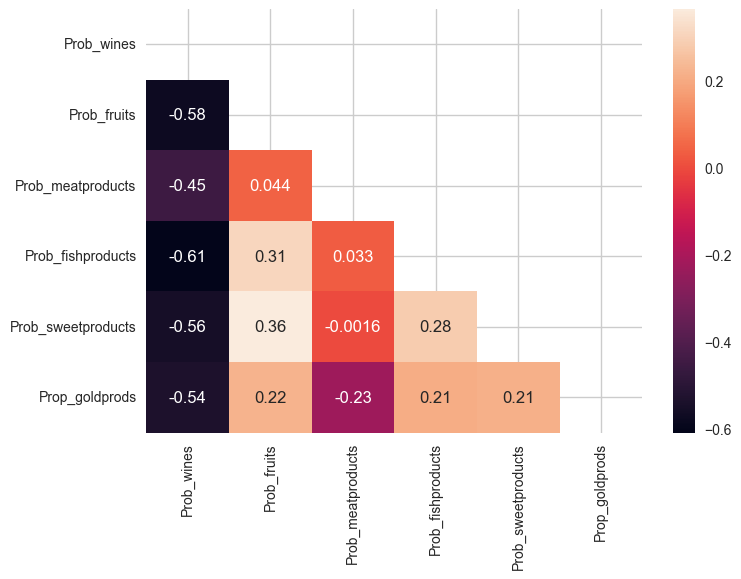

In [574]:
corr = df[prod_columns].corr()
mask = np.triu(np.ones_like(df[prod_columns].corr(), dtype=bool))
sns.heatmap(corr, annot=True, mask = mask)

Some purchases like fruits and sweet or fruits and fish are more correlated than others.

<Axes: ylabel='count'>

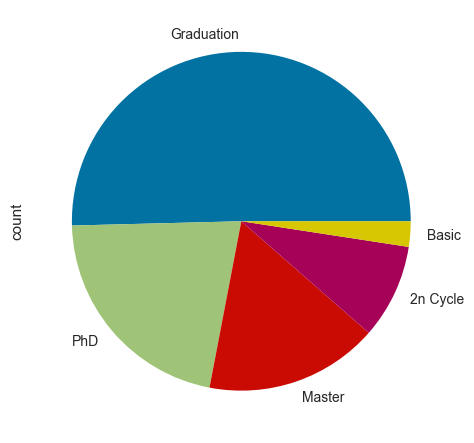

In [575]:
df['Education'].value_counts().plot(kind='pie')

most customers are graduated and holding a phd and master's degree.

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2228 non-null   object  
 1   Marital_Status        2228 non-null   object  
 2   Income                2228 non-null   float64 
 3   Kidhome               2228 non-null   int64   
 4   Teenhome              2228 non-null   int64   
 5   NumWebVisitsMonth     2228 non-null   int64   
 6   Complain              2228 non-null   int64   
 7   Days_since_enrolment  2228 non-null   int64   
 8   Age                   2228 non-null   int64   
 9   Total Spending        2228 non-null   int64   
 10  Prob_wines            2228 non-null   float64 
 11  Prob_fruits           2228 non-null   float64 
 12  Prob_meatproducts     2228 non-null   float64 
 13  Prob_fishproducts     2228 non-null   float64 
 14  Prob_sweetproducts    2228 non-null   float64 
 15  Prop_gold

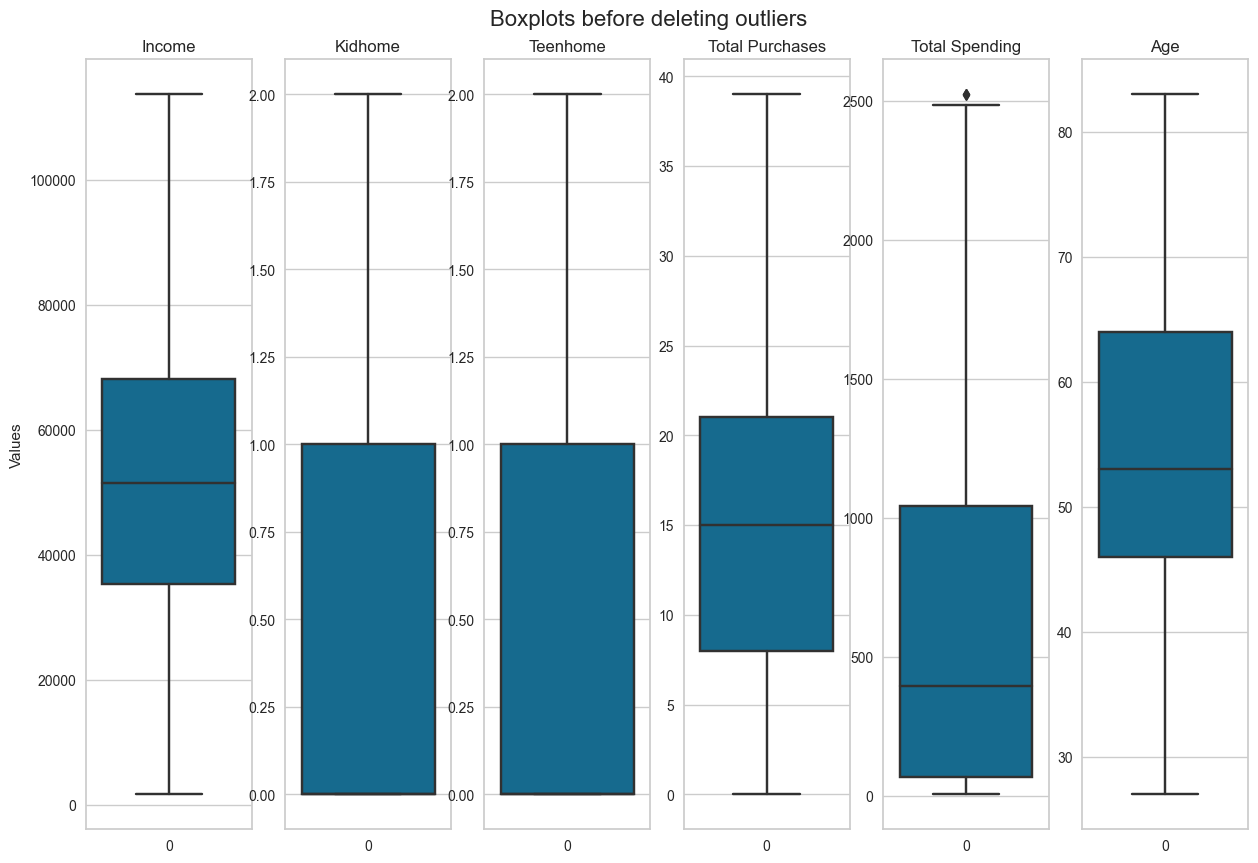

In [577]:
numeric_columns = ['Income', 'Kidhome','Teenhome','Total Purchases','Total Spending','Age']


def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(15,10)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=6, suptitle='Boxplots before deleting outliers')

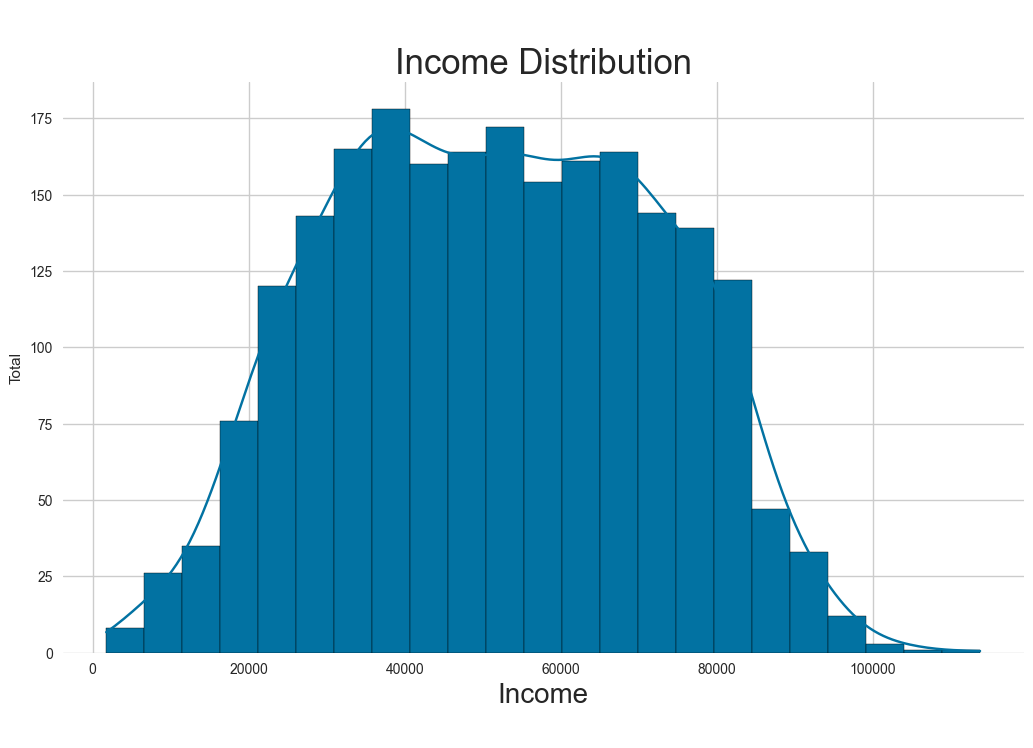

In [578]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(df['Income'], kde=True, bins='auto', alpha=1, fill=True)
ax.set_title('\nIncome Distribution', fontsize=25)
ax.set_xlabel('Income\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

The income is normally distributed.

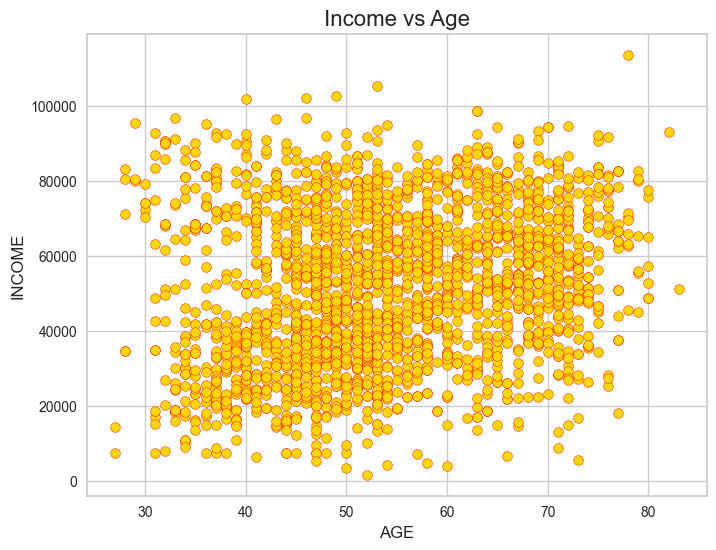

In [579]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], color='gold', edgecolors='red')
plt.title('Income vs Age', fontsize=16)
plt.xlabel('AGE', fontsize=12)
plt.ylabel('INCOME', fontsize=12)
plt.grid(True)
plt.show()

In [580]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'NumWebVisitsMonth', 'Complain', 'Days_since_enrolment', 'Age',
       'Total Spending', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods',
       'Offers_Responded_To', 'Total Purchases', 'Age_group'],
      dtype='object')

Text(0.5, 0.5, 'Total Spending')

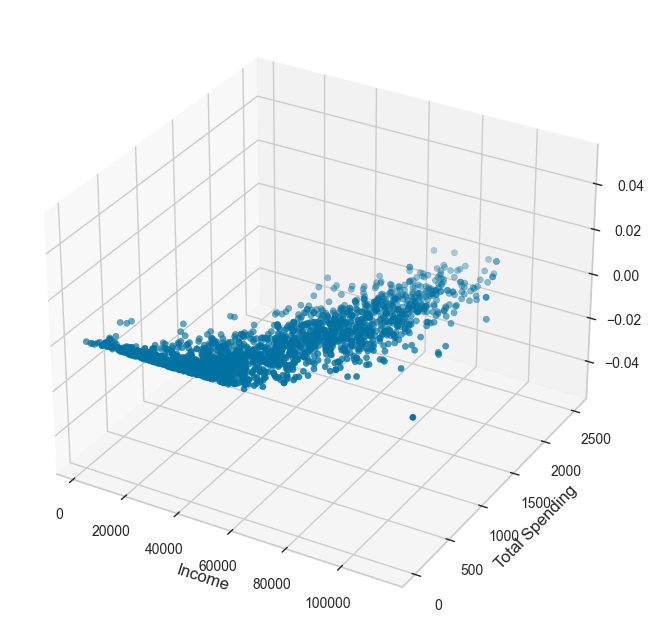

In [581]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['Total Spending'])
ax.set_xlabel('Income', fontsize = 12)
ax.set_ylabel('Total Spending', fontsize = 12)

As the income increases the total spending increases also.

#### Label encoding categorical features : 

In [582]:
from sklearn.preprocessing import LabelEncoder

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2228 non-null   object  
 1   Marital_Status        2228 non-null   object  
 2   Income                2228 non-null   float64 
 3   Kidhome               2228 non-null   int64   
 4   Teenhome              2228 non-null   int64   
 5   NumWebVisitsMonth     2228 non-null   int64   
 6   Complain              2228 non-null   int64   
 7   Days_since_enrolment  2228 non-null   int64   
 8   Age                   2228 non-null   int64   
 9   Total Spending        2228 non-null   int64   
 10  Prob_wines            2228 non-null   float64 
 11  Prob_fruits           2228 non-null   float64 
 12  Prob_meatproducts     2228 non-null   float64 
 13  Prob_fishproducts     2228 non-null   float64 
 14  Prob_sweetproducts    2228 non-null   float64 
 15  Prop_gold

In [584]:
le = LabelEncoder()

df1 = df.copy()

columns = ['Education', 'Marital_Status']

for column in columns: 
   df1[column] = le.fit_transform(df1[column])

In [585]:
df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases,Age_group
0,2,4,58138.0,0,0,7,0,663,66,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1,25,61-70
1,2,4,46344.0,1,1,5,0,113,69,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,6,61-70
2,2,5,71613.0,0,0,4,0,312,58,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,21,51-60
3,2,5,26646.0,1,0,6,0,139,39,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,8,31-40
4,4,3,58293.0,1,0,5,0,161,42,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,19,41-50


#### Scaling the data using standard scaler : 

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2228 non-null   object  
 1   Marital_Status        2228 non-null   object  
 2   Income                2228 non-null   float64 
 3   Kidhome               2228 non-null   int64   
 4   Teenhome              2228 non-null   int64   
 5   NumWebVisitsMonth     2228 non-null   int64   
 6   Complain              2228 non-null   int64   
 7   Days_since_enrolment  2228 non-null   int64   
 8   Age                   2228 non-null   int64   
 9   Total Spending        2228 non-null   int64   
 10  Prob_wines            2228 non-null   float64 
 11  Prob_fruits           2228 non-null   float64 
 12  Prob_meatproducts     2228 non-null   float64 
 13  Prob_fishproducts     2228 non-null   float64 
 14  Prob_sweetproducts    2228 non-null   float64 
 15  Prop_gold

# removing boolean columns L 

In [587]:
df1 = df1.drop('Complain', axis = 1)

In [588]:
df1['Children'] = df['Kidhome'] + df['Teenhome']

In [589]:
from sklearn.preprocessing import StandardScaler

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2228 non-null   object  
 1   Marital_Status        2228 non-null   object  
 2   Income                2228 non-null   float64 
 3   Kidhome               2228 non-null   int64   
 4   Teenhome              2228 non-null   int64   
 5   NumWebVisitsMonth     2228 non-null   int64   
 6   Complain              2228 non-null   int64   
 7   Days_since_enrolment  2228 non-null   int64   
 8   Age                   2228 non-null   int64   
 9   Total Spending        2228 non-null   int64   
 10  Prob_wines            2228 non-null   float64 
 11  Prob_fruits           2228 non-null   float64 
 12  Prob_meatproducts     2228 non-null   float64 
 13  Prob_fishproducts     2228 non-null   float64 
 14  Prob_sweetproducts    2228 non-null   float64 
 15  Prop_gold

In [591]:
df2 = df1.copy()
df2.drop('Age_group', axis=1, inplace=True)
scaler = StandardScaler()

scaled = scaler.fit_transform(df2)


In [592]:
scaled

array([[-0.34986559,  0.25121927,  0.31495474, ...,  0.61782568,
         1.33489124, -1.26596502],
       [-0.34986559,  0.25121927, -0.25821825, ..., -0.50311538,
        -1.16549   ,  1.39369558],
       [-0.34986559,  1.18098095,  0.96982214, ..., -0.50311538,
         0.80849519, -1.26596502],
       ...,
       [-0.34986559, -1.60830409,  0.25872605, ...,  0.61782568,
         0.54529717, -1.26596502],
       [ 0.54099217,  1.18098095,  0.85474044, ..., -0.50311538,
         1.07169322,  0.06386528],
       [ 1.43184993, -0.67854241,  0.05888823, ...,  0.61782568,
        -0.50749494,  1.39369558]])

In [593]:
df_scaled = pd.DataFrame(scaled, columns=df2.columns)

In [594]:
df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumWebVisitsMonth,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases,Children
0,-0.349866,0.251219,0.314955,-0.825141,-0.932066,0.689458,1.529621,1.015269,1.685034,-0.293624,0.089278,0.726089,0.448346,0.058145,-0.604509,0.617826,1.334891,-1.265965
1,-0.349866,0.251219,-0.258218,1.031843,0.904047,-0.139305,-1.190315,1.271560,-0.962496,-0.229058,-0.222638,-0.212360,0.033295,-0.225926,0.935552,-0.503115,-1.165490,1.393696
2,-0.349866,1.180981,0.969822,-0.825141,-0.932066,-0.553687,-0.206193,0.331828,0.284674,0.392511,0.245777,-0.688432,0.919631,-0.388922,-0.607245,-0.503115,0.808495,-1.265965
3,-0.349866,1.180981,-1.215515,1.031843,-0.932066,0.275076,-1.061736,-1.291345,-0.919203,-1.106604,0.466954,1.048791,1.506151,0.093799,-0.238146,-0.503115,-0.902292,0.063865
4,1.431850,-0.678542,0.322488,1.031843,-0.932066,-0.139305,-0.952939,-1.035055,-0.304776,-0.217883,0.941052,0.254252,0.482209,0.214345,-0.777759,-0.503115,0.545297,0.063865


#### Dimensionality reduction by PCA : 

Dimensionality Reduction is the process of reducing attributes in the data while preventing its essential information. Its aim is to remove redudadant or irrelavant features from the data and improve effieciency.

while PCA is a specific technique for accomplishing dimensionality reduction by finding new variables (principal components) that capture the most important information and patterns in the data.

In [595]:
from sklearn.decomposition import PCA 

In [596]:
pca = PCA()

pca.fit(df_scaled)

PCA()

#### Plotting cumulative variance ratio and find a suitable number of PCs : 

In [597]:
pca.n_components_

18

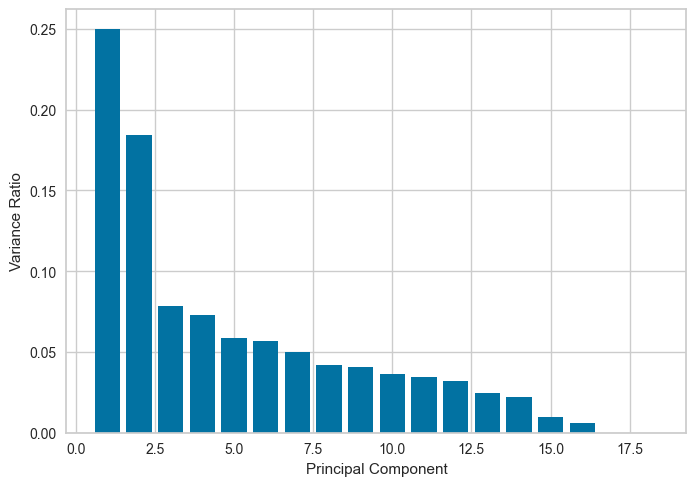

In [598]:
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

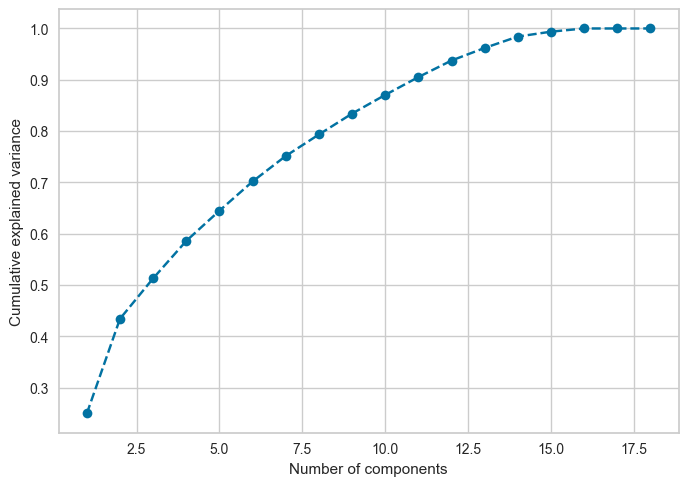

In [599]:
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

it is recommended that the total variance explained by all components should be between 70% and 80%, hence : 

We need 9 components.

In [600]:
d = np.argmax(np.cumsum(pca.explained_variance_ratio_)>= 0.8) + 1
d

9

In [601]:
pca = PCA(n_components= 9)
pca.fit(df_scaled)

x_pca = pca.transform(df_scaled)
x_pca = pd.DataFrame(x_pca, columns=['D1','D2','D3','D4','D5','D6','D7','D8','D9'])
x_pca

,D1,D2,D3,D4,D5,D6,D7,D8,D9
0,-1.850388,-1.655304,0.989375,-1.430355,0.917517,-0.688341,-0.917542,0.679068,-0.408030
1,1.688165,1.530634,-0.163821,1.749269,0.059520,-0.132314,0.931725,0.949842,-0.602727
2,-1.443501,-1.174530,0.436348,0.612234,-0.444434,-1.356450,-0.344937,-1.167474,-0.416819
3,2.521240,-1.295770,-1.710548,0.396358,0.596287,-0.921793,0.313653,-0.979375,-0.301927
4,0.267004,-0.565509,-1.463022,0.273119,0.024281,1.022144,-0.546259,-0.760173,0.944937
...,...,...,...,...,...,...,...,...,...
2223,-0.920748,0.276263,1.524343,0.312260,-0.369245,0.743583,0.097317,-0.174901,0.237876
2224,-0.754521,4.666820,-0.682072,0.822865,0.360455,-0.372199,1.927157,0.574812,0.683380
2225,-1.784883,-0.419564,-0.597717,-0.907624,-1.715392,1.482312,-0.233053,-1.248155,-0.151942
2226,-1.815951,0.343840,0.267840,1.892433,0.384014,-0.985058,0.187197,-0.083858,-0.186247


Plotting PCA with 3 components : 

In [602]:
def scatter_3d(x,y,z):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z,c='green', marker = 'o')
    ax.set_title('The plot of the clusters')
    plt.show()

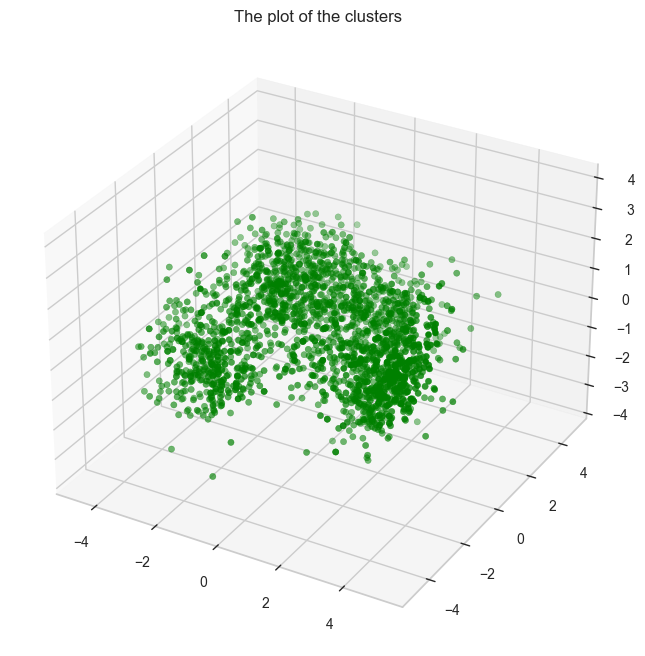

In [666]:
scatter_3d(x_pca['D1'],x_pca['D2'],x_pca['D3'])

### Clustering :

#### Clustering is a machine learning technique used to group similar data points together based on their characteristics or proximity. It aims to find natural groupings or clusters in the data without prior knowledge of the class labels. The goal is to discover inherent patterns or structures within the data.

#### in order to determine the best number of clusters to create, we will use the elbow method : 

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

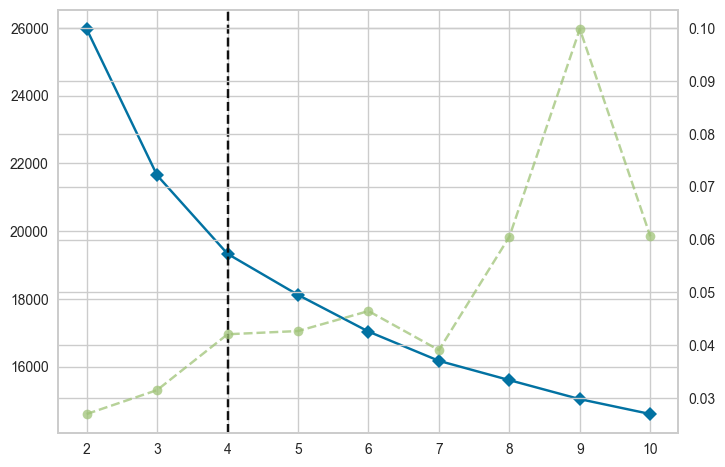

In [623]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(x_pca)
plt.show()

The above analysis shows that 4 clusters are the optimal number for the data.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

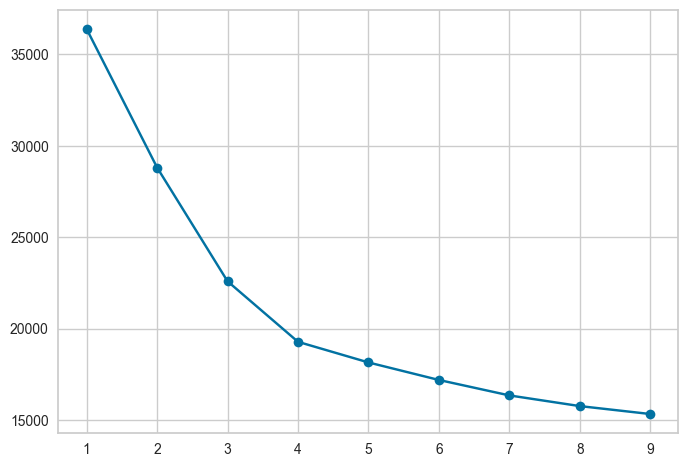

In [646]:
iner = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters= i , random_state= 1)
    kmeans.fit(x_pca)
    iner.append(kmeans.inertia_)
plt.plot(range(1, 10), iner, marker = 'o')    

In [647]:
kmeans = KMeans(n_clusters=4)
pred = kmeans.fit_predict(x_pca)
x_pca['Cluster'] = pred

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [648]:
x_pca['Cluster'].value_counts()

Cluster
3    657
0    620
1    531
2    420
Name: count, dtype: int64

In [649]:
x_pca.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'Cluster'], dtype='object')

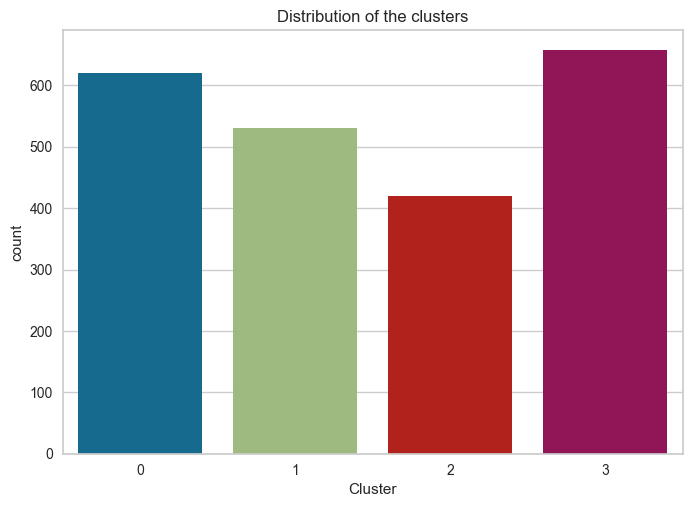

In [650]:
sns.countplot(x=x_pca['Cluster'])
plt.title('Distribution of the clusters')
plt.show()

In [667]:
df['Cluster'] = pred

In [668]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'NumWebVisitsMonth', 'Complain', 'Days_since_enrolment', 'Age',
       'Total Spending', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods',
       'Offers_Responded_To', 'Total Purchases', 'Age_group', 'Cluster'],
      dtype='object')

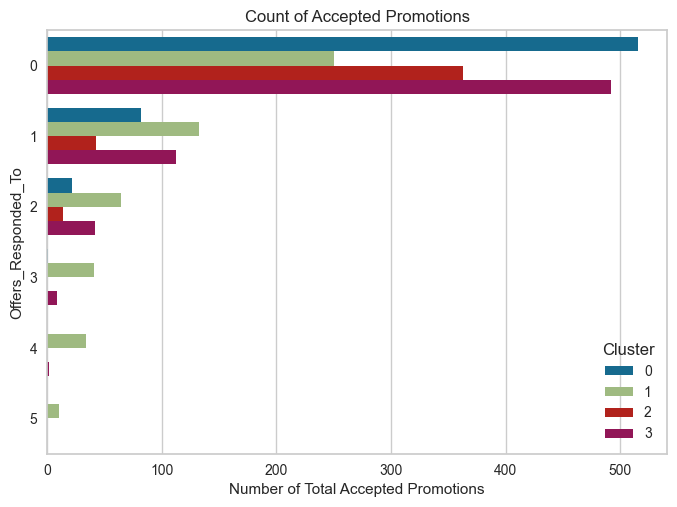

In [669]:
sns.countplot(data=df, y='Offers_Responded_To', hue='Cluster')
plt.title('Count of Accepted Promotions')
plt.xlabel('Number of Total Accepted Promotions')
plt.show()

We can see that there isn't much response to promotions and campaigns.
promotions and compaigns have a very low impact on the spending patterns of customers.

For the initial marketing campaign, the Ordinary and Potentially good customer groups had around 500 acceptances each, while the Good and Elite customer groups had 400 and 300 acceptances respectively.

In subsequent campaigns, the number of accepted promotions declined significantly. The Ordinary and Potentially good customers tent to not accept the offer, while only a small portion of the Good and Elite customers accepted it.

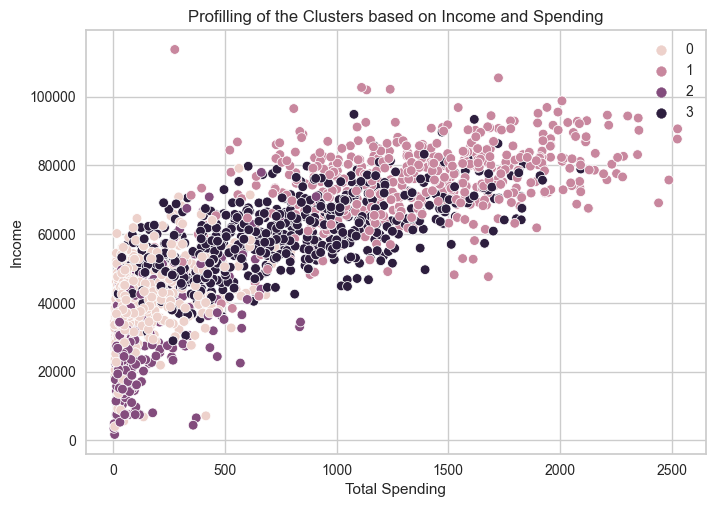

In [670]:
# Profilling culsters based on Income and Spending
sns.scatterplot(data=df, x='Total Spending', y='Income', hue='Cluster')
plt.title('Profilling of the Clusters based on Income and Spending')
plt.legend()
plt.show()

Income and the total spending have a strong relationship, clusters show a brief detail insights into their patterns : 

Group 0 : low spending average income => good ordianry customers.
Group 1 : high spending high income. => elite customers
Group 2 : low spending low income => ordinary customers
Group 3 : medium spending average income. => good customers


In [672]:
re_clust = {
    0: 'Good Ordinary Customer',
    1: 'Elite Customer',
    2: 'Ordinary Customer',
    3: 'Good Customer'}
df['Clusters_Customers'] = df['Cluster'].map(re_clust)

In [687]:
df2['Cluster'] = pred
df2['Clusters_Customers'] = df['Cluster'].map(re_clust)

In [673]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'NumWebVisitsMonth', 'Complain', 'Days_since_enrolment', 'Age',
       'Total Spending', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods',
       'Offers_Responded_To', 'Total Purchases', 'Age_group', 'Cluster',
       'Clusters_Customers'],
      dtype='object')

In [685]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2228 non-null   int32  
 1   Marital_Status        2228 non-null   int32  
 2   Income                2228 non-null   float64
 3   Kidhome               2228 non-null   int64  
 4   Teenhome              2228 non-null   int64  
 5   NumWebVisitsMonth     2228 non-null   int64  
 6   Days_since_enrolment  2228 non-null   int64  
 7   Age                   2228 non-null   int64  
 8   Total Spending        2228 non-null   int64  
 9   Prob_wines            2228 non-null   float64
 10  Prob_fruits           2228 non-null   float64
 11  Prob_meatproducts     2228 non-null   float64
 12  Prob_fishproducts     2228 non-null   float64
 13  Prob_sweetproducts    2228 non-null   float64
 14  Prop_goldprods        2228 non-null   float64
 15  Offers_Responded_To   2228

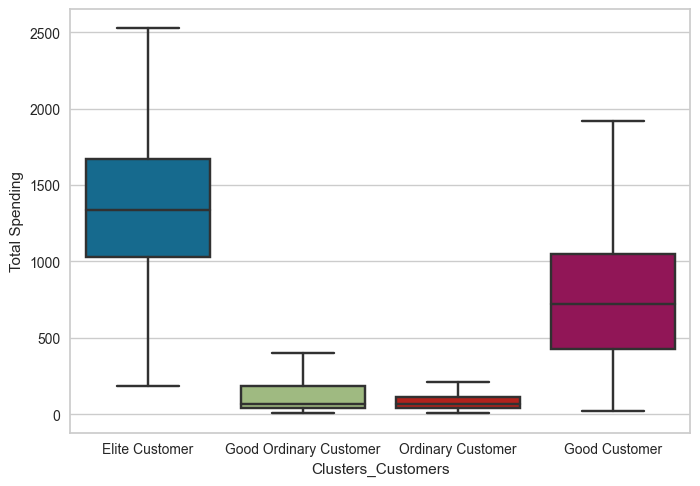

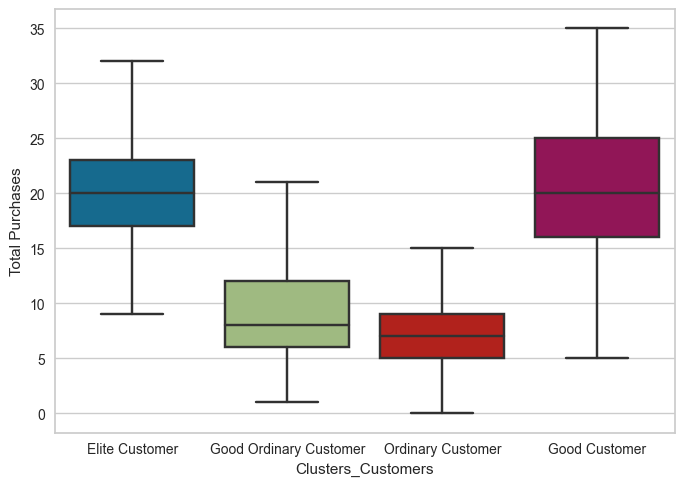

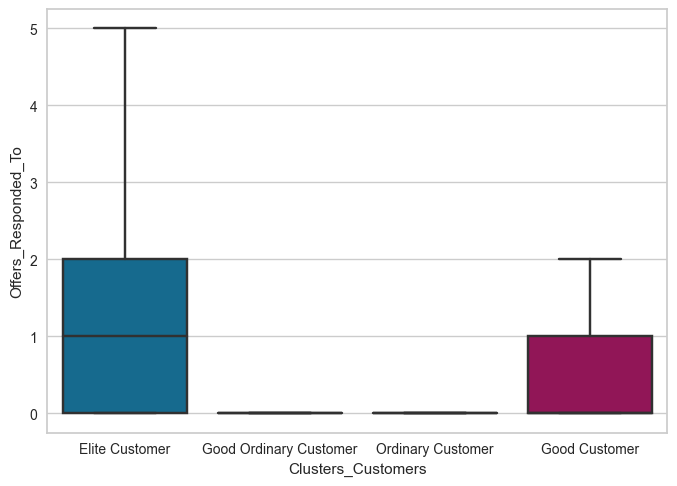

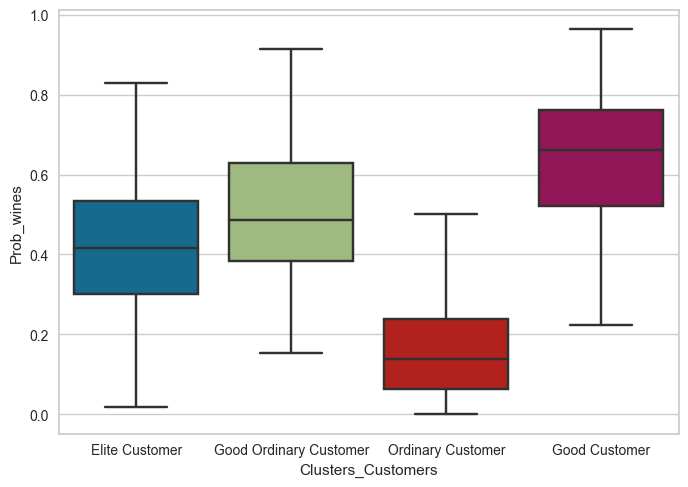

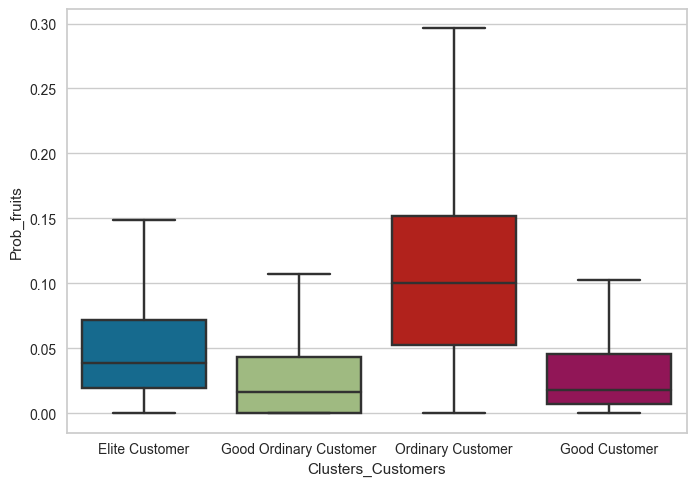

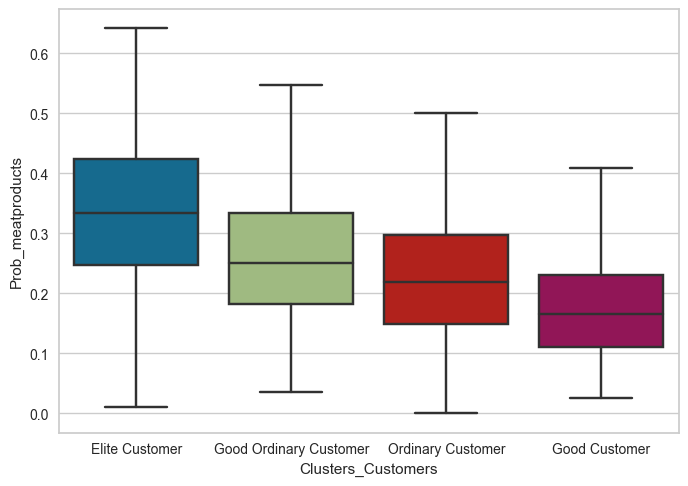

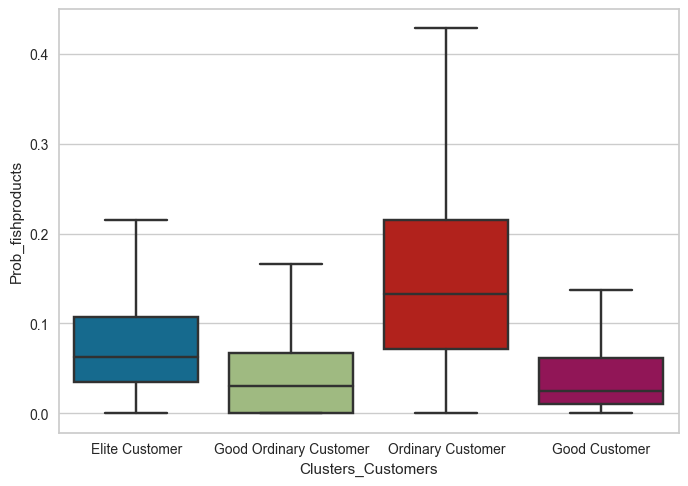

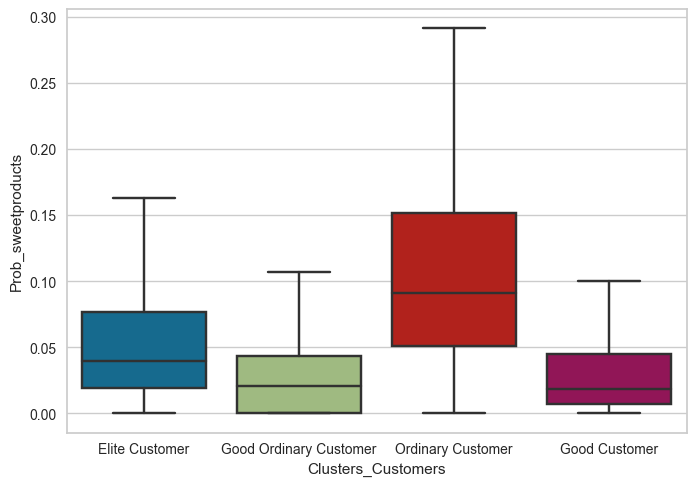

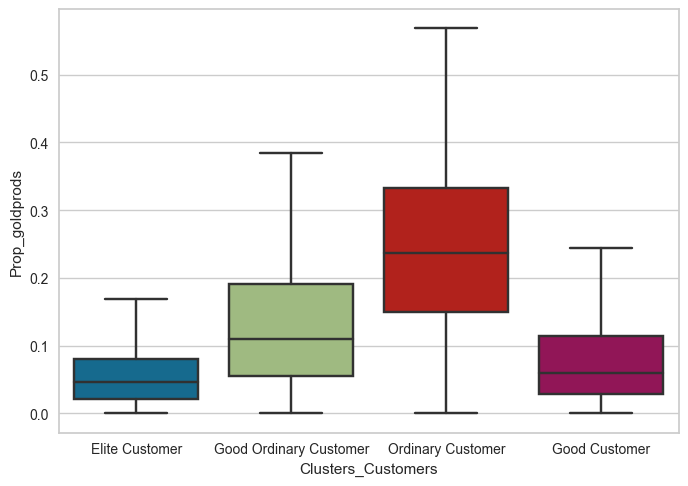

In [689]:
for col in ['Total Spending','Total Purchases','Offers_Responded_To', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts','Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods'] :
    sns.boxplot(data=df, x='Clusters_Customers', y=col, showfliers=False)
    plt.show()

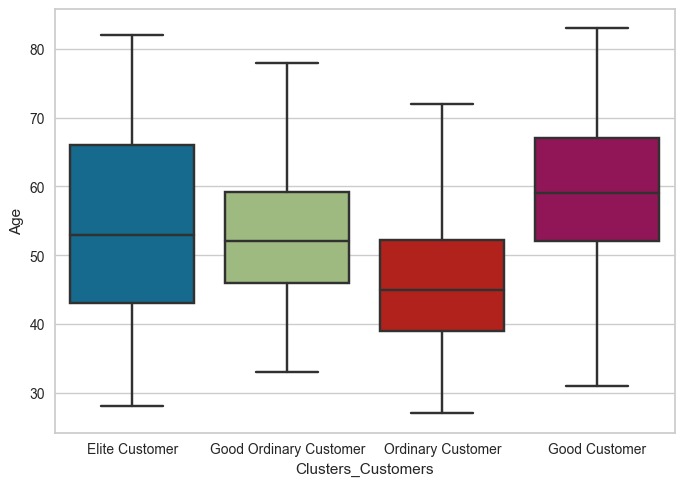

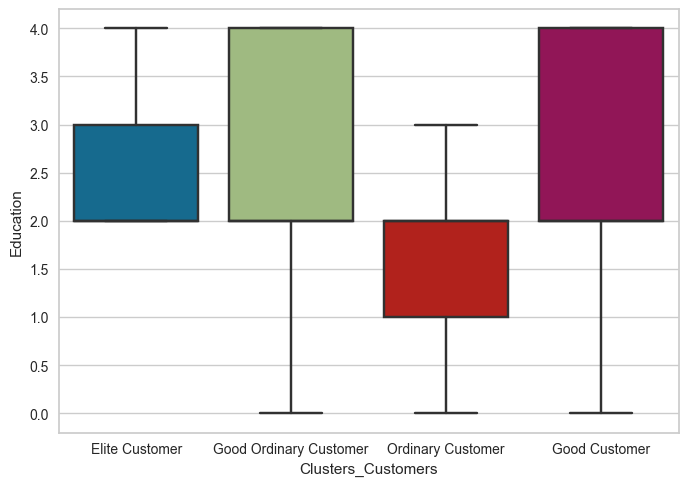

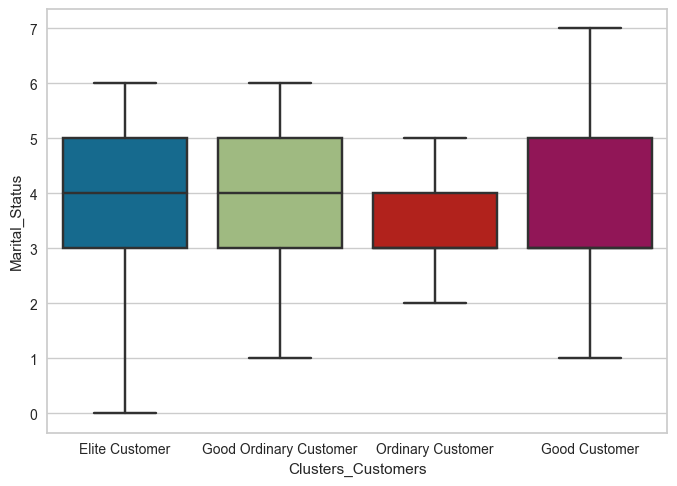

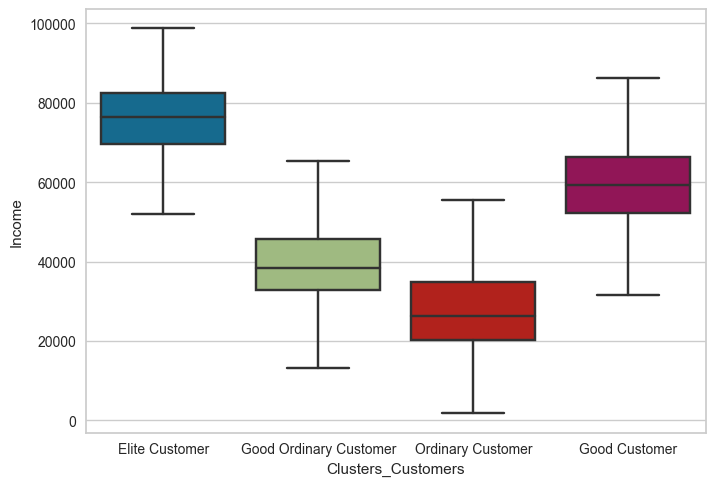

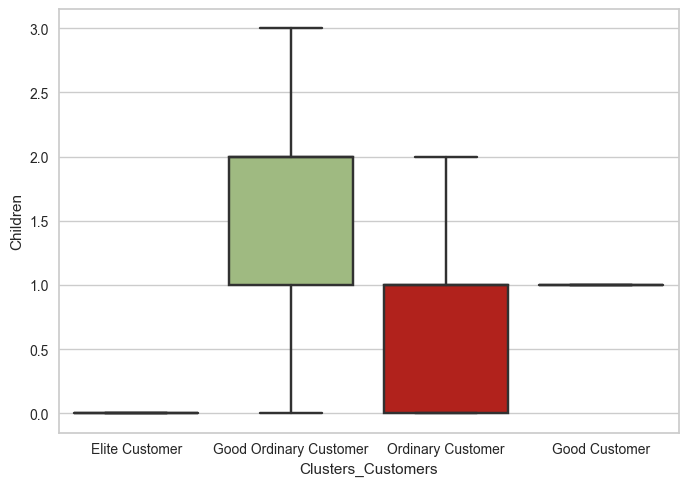

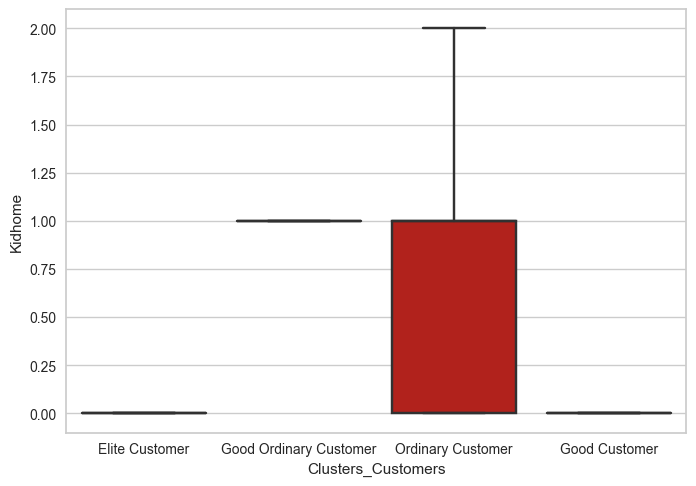

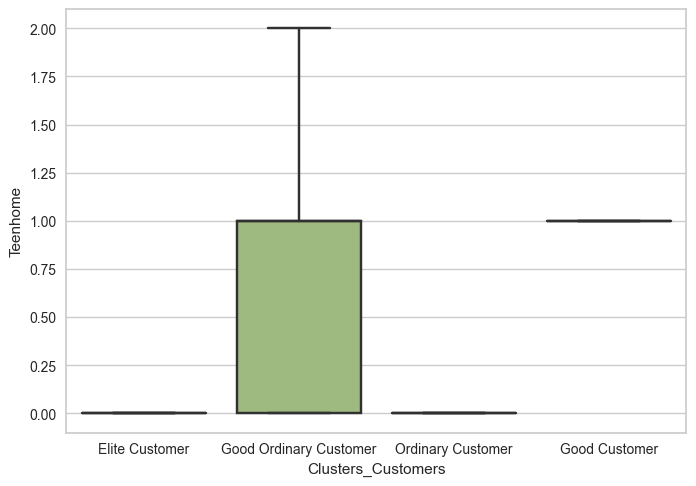

In [688]:
for col in ['Age','Education','Marital_Status','Income', 'Children','Kidhome','Teenhome']:
    sns.boxplot(data=df2, x='Clusters_Customers', y=col, showfliers=False)
    plt.show()

0
usually younger/older? older, around 50
low/high income? High income
married/single? more than 50% but least likely out of all clusters
have children? kids? teens? no - least likely to have kids of all clusters
highly educated? yes, but more medium than very high

Do they spend a lot with the company? They spend quite a lot - the most What products do they usually purchase? mostly meat and wine

Are they customers who make purchases during deals? likely 1, not really otherwise Are they more likely to respond to offers? Yes, more so than any other cluster
When was their last purchase? around 49 days ago

0
usually younger/older? older, around 50
low/high income? High income
married/single? more than 50% but least likely out of all clusters
have children? kids? teens? no - least likely to have kids of all clusters
highly educated? yes, but more medium than very high

Do they spend a lot with the company? They spend quite a lot - the most What products do they usually purchase? mostly meat and wine

Are they customers who make purchases during deals? likely 1, not really otherwise Are they more likely to respond to offers? Yes, more so than any other cluster
When was their last purchase? around 49 days ago

1
usually younger/older? Older around 52 low/high income?Low
married/single?More likely married/together 70% liklihood
have children? kids? teens? likely 2, most likey are kids than teens
highly educated? yes, the highest of all clusters

Do they spend a lot with the company? Not particularly
What products do they usually purchase? Wine is most, meat second and gold third

Are they customers who make purchases during deals? Yes, likely 2
Are they more likely to respond to offers? the least likely, no
When was their last purchase? around 49 days ago

2¶
usually younger/older? around 57 - oldest low/high income? Higher income
married/single? More likely married/together
have children? kids? teens? Most likely have 1 child - likely a teen at home
highly educated? Usually a higher education

Do they spend a lot with the company? Yes
What products do they usually purchase? Mostly wines and a bit of meat products

Are they customers who make purchases during deals? Yes, more so than the other clusters, likely 3 times
Are they more likely to respond to offers? yes, but much less so than 0 When was their last purchase? around 48 days ago.

3¶
usually younger/older? younger, around 45, youngest low/high income? low income
married/single?More likely married/together, just over 60%
have children? kids? teens? Mostly likely to have 1 children, likely just kids not teens at home
highly educated? Not particularly educated

Do they spend a lot with the company? Don't spend that much
What products do they usually purchase? Usually purchase meat and gold products, but have a higher baseline of others like fruits and fish.

Are they customers who make purchases during deals? 1 or 2 usually
Are they more likely to respond to offers? No
When was their last purchase? around 49 days ago

In [690]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'NumWebVisitsMonth', 'Complain', 'Days_since_enrolment', 'Age',
       'Total Spending', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods',
       'Offers_Responded_To', 'Total Purchases', 'Age_group', 'Cluster',
       'Clusters_Customers'],
      dtype='object')

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarnin

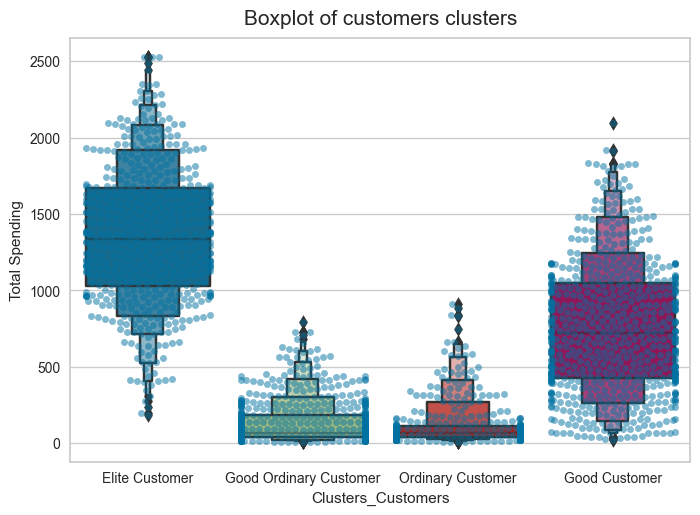

In [694]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters_Customers"], y=df["Total Spending"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters_Customers"], y=df["Total Spending"])
pl.set_title("Boxplot of customers clusters", pad=10, size=15)
plt.show()

The box plot indicates that Elite and Good customers spend significantly more per customer, averaging at £1400 and £800 respectively, compared to Ordinary and Potentially good customers whose spending range is around £500 only. As a result, different marketing campaigns will be developed for each group. To begin this process, we will examine the past marketing campaigns to see how much each group spent on the targeted marketing strategies.